In [1]:
import ps, ps_utils, ps_admin
import numpy as np
import pandas as pd
import datetime as dt
ps_utils.switch_to_dev()
import matplotlib.pyplot as plt 

ps_admin.set_strat_global_algo_id('8a3bd65168b276d6d30a3e19664092d301e499ab')

[ERROR] 2023-01-26 15:50:58,329 - You do not have xbbg installed, some functionality will not be available
[INFO] 2023-01-26 15:51:14,243 - ps client switched from prod_pvlss to dev
[INFO] 2023-01-26 15:51:14,892 - Nothing to do: global_algo_id is already set to 8a3bd65168b276d6d30a3e19664092d301e499ab


In [3]:
curve = 'RUB_KEY_RATE'
curve = 'RUB_MOSPRIME_3M'
expiry = dt.date(2029,9,2)

cheyette1f = ps_utils.pricing.CapFloor.create(curve,  
                                       pd.DataFrame({'PeriodStartDates':[expiry]}),
                                       strike = 0.01,
                                       model_type ='Cheyette1FactorModel', 
                                       calc_method = 'MonteCarloWithAAD',
                                       mds = ps_utils.get_mds(dt.date(2022,9,2)))
cheyette1f.set_nb_paths(2**18)
cheyette1f.set_model_parameter('CalibrationUnderlyings',{'RUB':curve})
# cheyette1f.set_product_parameter('Notionals', [100e6])
cheyette1f.cleanup_market_data_set()
# cheyette1f.set_mean_reversion(curve, 0.25)

# cheyette1f.bump_volatility(-0.01, [curve] )

vol = ps.get(cheyette1f.Model.MarketDataSet.VolatilitySurfaces[curve])
vol.VolatilityQuotes = [
[0.029706,0.030442,0.031162,0.031865,0.032552,0.033226,0.033886,0.034537,0.035381,0.036969,0.040000,0.044222,0.048791,0.053361,0.057451,0.061257,0.064839,0.068233,0.071467,0.074560,0.077530,0.080390,0.083152],
[0.024224,0.025571,0.026850,0.028071,0.029241,0.030366,0.031452,0.032629,0.034214,0.036607,0.040000,0.044001,0.048193,0.052420,0.056619,0.060373,0.063741,0.066940,0.069992,0.072918,0.075730,0.078441,0.081062],
[0.020498,0.022484,0.024308,0.026004,0.027596,0.029046,0.030355,0.031825,0.033768,0.036488,0.040000,0.043930,0.047988,0.052071,0.056144,0.060144,0.063596,0.066651,0.069572,0.072375,0.075074,0.077679,0.080199],
[0.024886,0.024121,0.023307,0.022892,0.025302,0.026967,0.028722,0.030694,0.033198,0.036353,0.040000,0.043845,0.047739,0.051630,0.055506,0.059352,0.063142,0.066790,0.070049,0.072568,0.074936,0.077231,0.079460],
[0.024809,0.023660,0.022785,0.022541,0.023887,0.025939,0.027900,0.030178,0.032962,0.036303,0.040000,0.043808,0.047629,0.051433,0.055211,0.058957,0.062659,0.066295,0.069808,0.073125,0.076020,0.078179,0.080139],
[0.024064,0.022947,0.022092,0.021811,0.023026,0.025238,0.027393,0.029860,0.032835,0.036278,0.040000,0.043782,0.047556,0.051304,0.055018,0.058694,0.062327,0.065902,0.069401,0.072783,0.075981,0.078948,0.081392],
[0.020526,0.019570,0.018477,0.018167,0.020263,0.023369,0.026180,0.029241,0.032736,0.036367,0.039998,0.043590,0.047129,0.050612,0.054036,0.057400,0.060698,0.063923,0.067067,0.070117,0.073057,0.075869,0.078514],
[0.021298,0.020098,0.018999,0.018424,0.019488,0.022347,0.025835,0.029307,0.032819,0.036417,0.040000,0.043491,0.046898,0.050235,0.053504,0.056700,0.059821,0.062867,0.065834,0.068717,0.071510,0.074204,0.076792],
[0.020141,0.019402,0.018205,0.017148,0.019040,0.022092,0.025609,0.029270,0.032925,0.036508,0.040000,0.043392,0.046692,0.049908,0.053044,0.056102,0.059082,0.061985,0.064809,0.067553,0.070215,0.072792,0.075279],
[0.020523,0.019458,0.018651,0.018371,0.019239,0.021689,0.025321,0.029276,0.033057,0.036603,0.040000,0.043302,0.046516,0.049637,0.052667,0.055611,0.058476,0.061263,0.063973,0.066606,0.069161,0.071638,0.074036],
[0.021085,0.019849,0.018516,0.017808,0.018697,0.021537,0.025372,0.029364,0.033115,0.036638,0.039999,0.043241,0.046377,0.049413,0.052356,0.055211,0.057984,0.060679,0.063297,0.065841,0.068310,0.070706,0.073028],
[0.020941,0.020777,0.019985,0.018676,0.019071,0.022001,0.025625,0.029403,0.033084,0.036623,0.040001,0.043210,0.046278,0.049234,0.052099,0.054880,0.057582,0.060204,0.062749,0.065219,0.067619,0.069948,0.072208],
[0.020839,0.019901,0.018620,0.017490,0.019545,0.022427,0.025780,0.029371,0.033022,0.036596,0.040000,0.043189,0.046202,0.049086,0.051877,0.054594,0.057234,0.059799,0.062285,0.064697,0.067039,0.069312,0.071520],
[0.020730,0.019608,0.018254,0.018302,0.020023,0.022608,0.025780,0.029317,0.032981,0.036583,0.040000,0.043171,0.046139,0.048964,0.051691,0.054347,0.056933,0.059448,0.061888,0.064253,0.066546,0.068774,0.070937],
[0.020221,0.019397,0.019087,0.019492,0.020736,0.022831,0.025703,0.029169,0.032867,0.036534,0.039998,0.043169,0.046102,0.048872,0.051534,0.054131,0.056668,0.059140,0.061542,0.063870,0.066126,0.068315,0.070441]]

delattr(vol, 'Strikes')
# vol.InterpolationMethod = 'Linear'
# vol.ExtrapolationMethod = 'Flat'
vol.AbsoluteForwardMoneynesses = [-0.150,-0.135,-0.120,-0.105,-0.090,-0.075,-0.060,-0.045,-0.030,-0.015, -0.  , 0.015, 0.030, 0.045, 0.060, 0.075, 0.090, 0.105, 0.120, 0.135, 0.150, 0.165, 0.180]
# cheyette1f.Model.MarketDataSet.VolatilitySurfaces[curve] = vol
# cheyette1f.set_model_parameter('NumberOfLocalVolatilityUnderlyingPoints', 250)


# cheyette1f.set_model_parameter('LocalVolatilityNumberOfSmoothingPoints', 0.)
# cheyette1f.set_model_parameter('LocalVolatilityMinimum', 0.001)
# cheyette1f.set_model_parameter('LocalVolNumberOfTimeStepsPerYear', 150)
# cheyette1f.set_model_parameter('MonteCarloMaxStepInHours', 24)
cheyette1f.set_model_parameter('LocalVolatilityRangeNumberOfStdDevs', 1.8)
cheyette1f.set_model_parameter('LocalVolatilityMaximumAllowedPercentageOfBrokenPoints', 0.25)

mds = cheyette1f.get_mds()

# cheyette1f.set_volatility(curve, 0.04)

cheyette2f = cheyette1f.clone().set_model_parameter('TypeName', 'Cheyette2FactorModel')
cheyette2f.Model.MarketDataSet.GenericScalars[curve]['Cheyette2FactorModel']=\
{'MeanReversion':2.5,'MeanReversionSpread':-1.5,'FactorVolatilityRatio':0.7, 'FactorCorrelation':0.5}
cheyette2f

lgm1f = cheyette1f.clone().set_model_parameter('TypeName', 'HybridLGM1FDupireLocalVolatilityModel')
analytic = cheyette1f.clone().set_calculation_method('AnalyticWithAAD')

grid = np.linspace(0.01, 0.3, 33)
definition = ps_utils.scenario.ScenarioDefinition('Product.Strike', '=', grid)


df_cheyette1f = cheyette1f.run_generic_ladder_scenario(definition)
df_cheyette2f = cheyette2f.run_generic_ladder_scenario(definition)
df_lgm1f = lgm1f.run_generic_ladder_scenario(definition)
df_analytic = analytic.run_generic_ladder_scenario(definition)

df1 = df_cheyette1f
df2 = df_lgm1f
df4 = df_cheyette2f
df3 = df_analytic

df1.columns=['Cheyette1F']
df2.columns=['LinearGaussian1F']
df3.columns=['Analytic']
df4.columns=['Cheyette2F']


[INFO] 2023-01-26 15:53:01,842 - Created a cap/floor request: 49ee03eef0a7225f647952db04fff63fa7cc0cfe
[INFO] 2023-01-26 15:53:02,072 - Market Data Set is cleaned up, updated request is c7955662c9c47de8c1e6731a0efd7b3198164043
[INFO] 2023-01-26 15:53:02,256 - Batch #1:6ea1121f362b591d4c366b1e1eb79d5e37b8354b->921e46f5baefe05b9d05591782fc172d26fe2a4f
[INFO] 2023-01-26 15:53:02,783 - Batch #1:d364da1b589947e2044e17f9d949557bcc408fff->6e441030c7cd78ec85989bd9751369ec85a5756e
[INFO] 2023-01-26 15:53:03,305 - Batch #1:b9a28143fc270425ae63d5d50a07270b77d6f361->bcb73a5acd53ed247715ac18bf1d829b9d6ab73c
[INFO] 2023-01-26 15:53:03,815 - Batch #1:7b45162bbee5d7b618bb3c600d2e781097c78aad->ef8d2815fb46013b1307b6cbac88a70150e2e26f


In [58]:

df = pd.DataFrame({
    'Cheyette1F': df1['Cheyette1F'],
    'Cheyette2F': df_cheyette2f['Cheyette2F'],
    'LinearGaussian1F': df_lgm1f['LinearGaussian1F'],
    'Analytic': df_analytic['Analytic']    
})

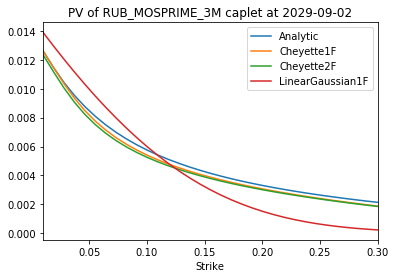

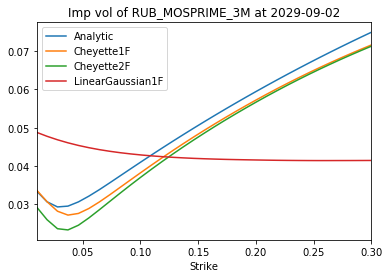

In [59]:

#data = pd.merge(df1,df2, how='inner', on = 'Override value')
#data = pd.merge(data,df3, how='inner', on = 'Override value')
#data = pd.merge(data,df4, how='inner', on = 'Override value')
data = pd.DataFrame({
    'Cheyette1F': df1['Cheyette1F'],
    'Cheyette2F': df_cheyette2f['Cheyette2F'],
    'LinearGaussian1F': df_lgm1f['LinearGaussian1F'],
    'Analytic': df_analytic['Analytic']    
})
data.index.name='Strike'
data.plot(title = f'PV of {curve} caplet at {expiry}')
plt.show()

df = ps_utils.get_analytic_discount('RUB_RUONIA_OIS', expiry, mds)
fwd = ps_utils.get_analytic_forward(curve, expiry, mds)
T = (expiry - mds.AsOfDate.date()).days / 365

for model in data:
    for strike in data[model].index:
        pv = data[model][strike] / df /0.23
        vol = ps_utils.implied_bachelier_volatility(fwd,strike,T, pv)
        data[model][strike] = vol
        
data.plot(title = f'Imp vol of {curve} at {expiry}')
plt.show()

In [60]:
price_dt = dt.date(2022, 8, 15)
mds = ps_utils.market.get_mds(price_dt)
start_dt = ps_utils.get_dates_from_shifters(price_dt,'3M','MWB','Following')
maturity = ps_utils.get_dates_from_shifters(start_dt,'5Y','MWB','ModifiedFollowing')
schedule = ps_utils.get_schedule(start_dt,maturity,'3M','MWB','ModifiedFollowing')
data = {
    'PeriodStartDates':schedule[:-1],
    'PeriodEndDates': schedule[1:],
    'FloatingRateFixingDates': ps_utils.get_reset_dates(schedule[:-1],'RUB_KEY_RATE')
}
cap_schedule = pd.DataFrame(data)
cap = ps_utils.pricing.CapFloor.create(index='RUB_KEY_RATE', schedule=cap_schedule, strike=0.1, payoff_type='Cap',mds=mds)


[INFO] 2023-01-26 16:26:55,079 - Created a cap/floor request: ae24b792a59d7c6431fd50c55924eaf6060e3e64


In [46]:
# TARF is kind of like a capfloor but with extra features
tarf = cap.clone()
tarf.set_product_parameter('TypeName', 'InterestRatesTargetedRedemptionProduct')
tarf.set_product_parameter('PayoffType', 'Forward')
tarf.set_product_parameter('IndexIdentifier','RUB_KEY_RATE')
tarf.set_product_parameter('Strike',0.00)
tarf.set_product_parameter('Notionals',[100e6] * len(tarf.Product.PeriodStartDates)  )
tarf.set_product_parameter('TargetAccrual',15e6 )
tarf.set_calculation_method('MonteCarloWithAAD')
tarf.set_request_parameter('NumberOfPaths',2**16)
tarf.set_model_parameter('TypeName', 'Cheyette2FactorModel')

tarf.Model.MarketDataSet.GenericScalars.RUB_KEY_RATE['Cheyette2FactorModel']=\
{'MeanReversion':2.5,'MeanReversionSpread':-2.0,'FactorVolatilityRatio':0.3, 'FactorCorrelation':0.5}

tarf.set_model_parameter('LocalVolatilityMaximumAllowedPercentageOfBrokenPoints', 0.5)
tarf.set_model_parameter('CalibrationUnderlyings',{'RUB':'RUB_KEY_RATE'})
tarf.cleanup_market_data_set()
tarf.price(['ProductValue', 'CashFlows', 'ProductEvents', 'Runtime'])

tarf.get_product_events()

[INFO] 2022-09-06 16:30:05,755 - Market Data Set is cleaned up, updated request is 153fa268d65e5e6b54ca1ffdbd0c9f315243fdab
[INFO] 2022-09-06 16:30:05,869 - Compute:2e61f16179d0e8516d3d85d9d3879a510d795fa4->0c49d61b059a17b3afb272006d29812dfb014bed
[INFO] 2022-09-06 16:30:07,733 - Compute:9a37868185f0b571bb0206cd8229062456398300->905da0a58440919a3023042c26d4ac27bde32629


,Description,Value,StandardError,Leg,StatusText
EventDate,,,,,
2022-11-15,AutoCallEvent,0.00,0.00,0,Future
2023-02-15,AutoCallEvent,0.00,0.00,0,Future
2023-05-15,AutoCallEvent,0.00,0.00,0,Future
2023-08-15,AutoCallEvent,0.03,0.00,0,Future
2023-11-15,AutoCallEvent,0.06,0.00,0,Future
2024-02-15,AutoCallEvent,0.11,0.00,0,Future
2024-05-15,AutoCallEvent,0.16,0.00,0,Future
2024-08-15,AutoCallEvent,0.19,0.00,0,Future
2024-11-15,AutoCallEvent,0.19,0.00,0,Future


In [47]:
tarf.get_cashflows()

[INFO] 2022-09-06 16:30:09,752 - Compute:f8f2d7cd567aacf48dddaadab1d2e912fc66c1e4->b3106adfdc4c75ce5687362b777f66c74b40158a


,Description,Amount,StandardError,Currency,Leg,StatusText
Date,,,,,,
2023-02-15,Coupon,"1,939,799.48","2,057.57",RUB,0,Estimate
2023-05-15,Coupon,"1,763,004.70","2,802.49",RUB,0,Estimate
2023-08-15,Coupon,"1,908,745.24","3,594.37",RUB,0,Estimate
2023-11-15,Coupon,"1,825,974.92","3,540.62",RUB,0,Estimate
2024-02-15,Coupon,"1,687,262.32","3,565.13",RUB,0,Estimate
2024-05-15,Coupon,"1,442,753.27","3,448.21",RUB,0,Estimate
2024-08-15,Coupon,"1,169,101.54","3,425.97",RUB,0,Estimate
2024-11-15,Coupon,"819,684.76","3,164.85",RUB,0,Estimate
2025-02-17,Coupon,"502,156.87","2,692.25",RUB,0,Estimate


In [34]:
tarf.run_interest_rates_scenario(queries = ['ProductValue', 'ParallelRho', 'ParallelVega'], show=True)

[INFO] 2022-09-06 11:53:28,496 - Batch #1:ab787e0bd0fa416e5864a3a403dbe126e40985dc->e30c72a4d4dda5f3b302e357969136f95354b261
[INFO] 2022-09-06 11:54:00,817 - Batch #1:6d4b19a86a585d62bda029b150ca8ee64690d074->e997ffcc2f5bd8e7019975ea2e8e092992232e11


{'RUB_KEY_RATE':                ProductValue  ParallelRho.RUB_KEY_RATE  \
 Additive bump                                           
 -5.00         11,065,986.97            154,616,437.84   
 -4.69         11,528,693.06            129,576,959.40   
 -4.38         11,910,046.39            104,761,388.62   
 -4.06         12,213,694.16             82,884,227.20   
 -3.75         12,451,192.53             64,584,650.45   
 -3.44         12,634,430.49             50,296,677.39   
 -3.12         12,778,096.83             40,152,062.96   
 -2.81         12,893,726.61             33,272,714.26   
 -2.50         12,990,192.77             28,280,123.12   
 -2.19         13,073,261.27             24,939,807.62   
 -1.88         13,147,279.21             22,473,463.83   
 -1.56         13,214,285.86             20,495,397.15   
 -1.25         13,275,456.76             18,794,867.02   
 -0.94         13,331,622.67             17,298,310.34   
 -0.62         13,383,423.54             15,992,043.35  

In [24]:
scen = ps_utils.scenario.ScenarioDefinition(['Product.TargetAccrual'], '=', np.linspace(1e6, 100e6, 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue', 'ParallelRho'], show=True)

[INFO] 2022-09-06 11:47:57,750 - Batch #1:44a3b401144fac662a62c7b682711d0018c50863->34aa696eb46737389f5fd1d5f900e1527e282591


,ProductValue,ParallelRho.RUB_KEY_RATE,ParallelRho.RUB_RUONIA_OIS,ParallelRho.Total
Override value,,,,
"1,000,000.00","967,322.92","1,132.79","-487,642.26","-486,509.47"
"5,125,000.00","4,870,815.43","1,886,309.35","-3,706,026.83","-1,819,717.48"
"9,250,000.00","8,613,946.37","5,869,073.18","-9,158,004.60","-3,288,931.41"
"13,375,000.00","12,208,515.15","11,948,819.45","-16,715,231.53","-4,766,412.08"
"17,500,000.00","15,660,325.22","20,206,273.85","-26,295,630.75","-6,089,356.90"
"21,625,000.00","18,966,892.90","33,294,021.25","-37,766,901.26","-4,472,880.01"
"25,750,000.00","21,971,909.62","90,295,320.04","-50,062,592.31","40,232,727.73"
"29,875,000.00","24,112,040.02","209,543,054.58","-59,577,491.55","149,965,563.03"
"34,000,000.00","25,306,557.08","302,728,753.69","-65,046,478.98","237,682,274.71"


In [24]:
scen = ps_utils.scenario.ScenarioDefinition(['Product.Strike'], '=', np.linspace(0., 0.15, 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue', 'ParallelRho'], show=True)

[INFO] 2022-06-20 17:56:10,497 - Minibatch #1: 870a8a825ac31356baf7dd9aac6604b0dd8c3d85->25dc643357a9d3c4fa6caa4ec193e54aa1ad44c5
[INFO] 2022-06-20 17:56:20,293 - Minibatch done


,ProductValue,ParallelRho.RUB_KEY_RATE,ParallelRho.RUB_RUONIA_OIS,ParallelRho.Total
Override value,,,,
0.00000,9.031061e+06,1.269550e+07,-8.740576e+06,3.954926e+06
0.00625,8.901145e+06,1.717258e+07,-8.970537e+06,8.202043e+06
0.01250,8.730057e+06,2.133594e+07,-9.176058e+06,1.215988e+07
0.01875,8.495605e+06,3.028130e+07,-9.282039e+06,2.099926e+07
0.02500,8.189056e+06,3.951464e+07,-9.271058e+06,3.024358e+07
0.03125,7.791951e+06,5.074911e+07,-9.083707e+06,4.166540e+07
0.03750,7.290453e+06,6.597081e+07,-8.669479e+06,5.730133e+07
0.04375,6.668946e+06,8.405754e+07,-7.972432e+06,7.608511e+07
0.05000,5.917513e+06,1.036587e+08,-6.951336e+06,9.670732e+07


In [36]:
scen = ps_utils.scenario.ScenarioDefinition(['Model.MarketDataSet.GenericScalars.RUB_KEY_RATE.Cheyette2FactorModel.MeanReversion'], '=', np.linspace(2.05, 3., 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue'], show=True)

[INFO] 2022-09-06 11:55:51,537 - Batch #1:9942b5711df059d4be745231d128a5b3feeb7347->01d40c328eec26769abb9e9ca965c2b3dc1ea92d


,ProductValue
Override value,
2.05,"13,481,978.99"
2.09,"13,481,291.91"
2.13,"13,480,608.99"
2.17,"13,479,949.84"
2.21,"13,479,307.88"
2.25,"13,478,695.77"
2.29,"13,478,104.99"
2.33,"13,477,541.63"
2.37,"13,477,006.35"


In [37]:
tarf.price(['ParallelRho'])

[INFO] 2022-09-06 11:56:28,047 - Compute:fae28d947e7fcbc916e70fcc059de0cf38fc2190->172059e3ef4f623adca9d453e1a28b258d1e627f


Dict([('ParallelRho',
       Dict([('RUB_KEY_RATE', 13769515.751425155),
             ('RUB_RUONIA_OIS', -18232403.627083637)]))])

In [38]:
scen = ps_utils.scenario.ScenarioDefinition(['Model.MarketDataSet.GenericScalars.RUB_KEY_RATE.Cheyette2FactorModel.MeanReversionSpread'], '=', np.linspace(-2.45, -0.5, 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue'], show=True)

[INFO] 2022-09-06 11:57:46,137 - Batch #1:f24b4b36214fb73716a34541abbdddb17391dc04->578c381bf30764541834f287321ba9ef3bb6169f


,ProductValue
Override value,
-2.45,"13,481,238.47"
-2.37,"13,479,934.93"
-2.29,"13,478,716.46"
-2.21,"13,477,618.48"
-2.12,"13,476,648.29"
-2.04,"13,475,794.12"
-1.96,"13,475,039.48"
-1.88,"13,474,368.12"
-1.80,"13,473,767.46"


In [39]:
scen = ps_utils.scenario.ScenarioDefinition(['Model.MarketDataSet.GenericScalars.RUB_KEY_RATE.Cheyette2FactorModel.FactorVolatilityRatio'], '=', np.linspace(0., 1.0, 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue'], show=True)

[INFO] 2022-09-06 11:58:39,228 - Batch #1:312ef3b4b0dec4a790b7c780c9b750169ce07973->9e318b599b0785aff31a6de6952d7051a8a71702


,ProductValue
Override value,
0.00,"13,468,076.26"
0.04,"13,469,092.04"
0.08,"13,470,161.04"
0.12,"13,471,222.12"
0.17,"13,472,271.05"
0.21,"13,473,290.29"
0.25,"13,474,265.83"
0.29,"13,475,197.61"
0.33,"13,476,070.49"


In [41]:
scen = ps_utils.scenario.ScenarioDefinition(['Model.MarketDataSet.GenericScalars.RUB_KEY_RATE.Cheyette2FactorModel.FactorCorrelation'], '=', np.linspace(-1.0, +1.0, 25))
tarf.run_generic_ladder_scenario(scen, queries = ['ProductValue'], show=True)

[INFO] 2022-09-06 12:01:19,598 - Batch #1:30737982b38805af2aabf66a6627eb13775f78f6->7fe7c93a444237c23df32ab2964c945e9cc725b3


,ProductValue
Override value,
-1.00,"13,444,514.02"
-0.92,"13,451,566.82"
-0.83,"13,456,377.82"
-0.75,"13,459,934.59"
-0.67,"13,462,657.87"
-0.58,"13,464,813.73"
-0.50,"13,466,559.38"
-0.42,"13,468,001.17"
-0.33,"13,469,214.11"


In [22]:
expiry = dt.date(2032,6,15)
mds = ps_utils.get_mds()
ps_utils.get_analytic_forward('CNHRUB', expiry, mds)

18.52147406612398

In [23]:
spot = ps_utils.get_spot(mds,'CNHRUB')

In [24]:
spot

8.738585

In [25]:
# from FXCurves
foreign_df = ps_utils.get_analytic_discount('CNH_FX', expiry, mds)
domestic_df = ps_utils.get_analytic_discount('RUB_XCCY', expiry, mds)

In [26]:
spot/domestic_df*foreign_df

18.521755725644766